In [1]:
from os import chdir
chdir('/home/jovyan/')
import assimulo
import numpy as np
import matplotlib.pyplot as plt
import math
from modelbase.ode import Model, LabelModel, LinearLabelModel, Simulator, mca
from modelbase.ode import ratelaws as rl
from modelbase.ode import ratefunctions as rf
import lib.ReedModel as GPX

In [2]:
def GPXvm (alleleLength):
    return 4500*(1-.30*(alleleLength-11)*.02)

# figure 5a

![title](../data/fig5.png)

# figure 5b

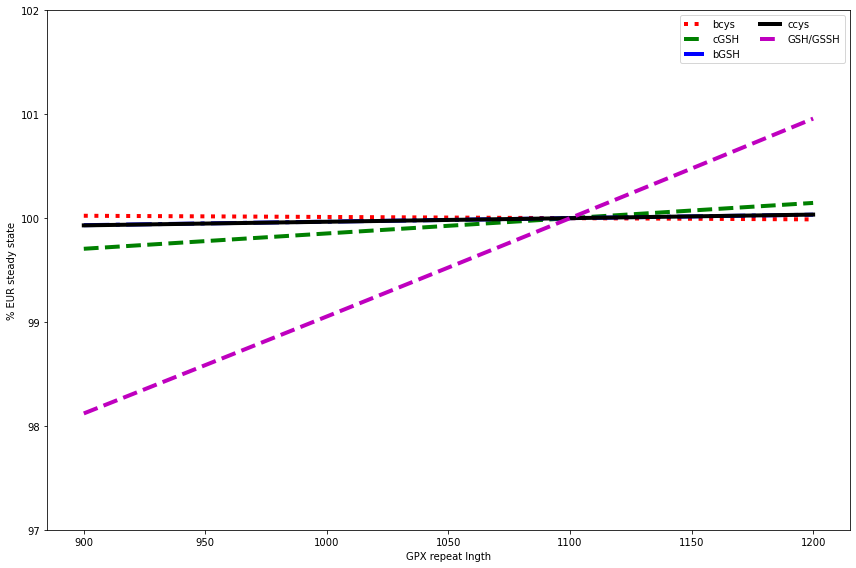

In [3]:
alleleLength = 11
European = GPX.steadyStateDict(50,GPXvm(alleleLength),.01)
ratios = { "flux":{k:list() for k in European["flux"].keys()}, "cmpd":{k:list() for k in European["cmpd"].keys()}, "xval":list() }
for allele in np.arange(9,12.1,.1):
    steadyStates = GPX.steadyStateDict(50,GPXvm(allele),.01)
    ratios["xval"].append(allele*100)
    a = [ratios["flux"][k].append(100*steadyStates["flux"][k]/European["flux"][k]) for k in European["flux"].keys()]
    a = [ratios["cmpd"][k].append(100*steadyStates["cmpd"][k]/European["cmpd"][k]) for k in European["cmpd"].keys()]

# plot results of the simulation
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel("GPX repeat lngth")
plt.ylabel("% EUR steady state")
plt.plot(ratios["xval"],ratios["cmpd"]["bcys"],'r:',label = "bcys",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["cGSH"],'g--',label = "cGSH",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["bGSH"],'b-.',label = "bGSH",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["ccys"],'k-',label = "ccys",linewidth=4)
plt.plot(ratios["xval"],[100*ratios["cmpd"]["cGSH"][i]/ratios["cmpd"]["cGSSG"][i] for i in range(len(ratios["cmpd"]["cGSSG"]))],'m--',label = "GSH/GSSH",linewidth=4)
plt.ylim((97,102)) 
plt.tight_layout()
plt.legend(ncol=2)
plt.show()

# figure 5c

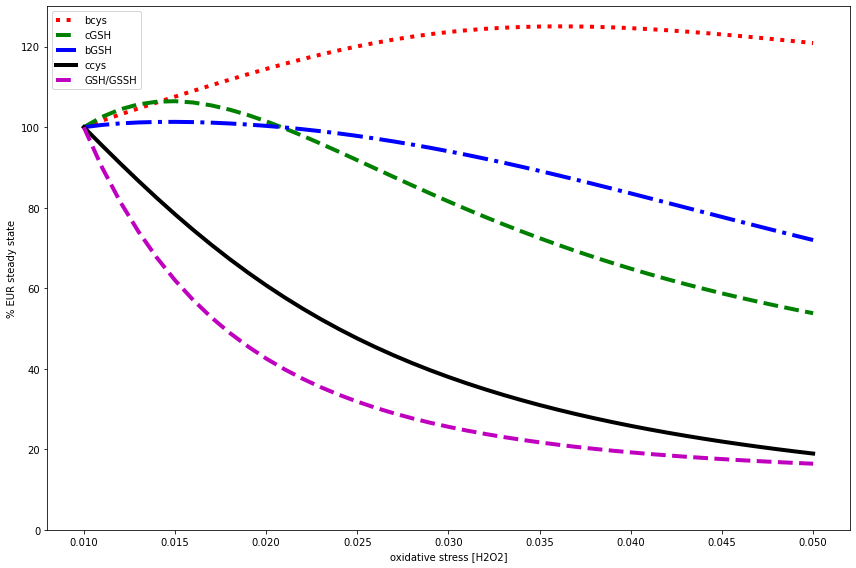

In [4]:
alleleLength = 11
European = GPX.steadyStateDict(50,GPXvm(alleleLength),.01)
ratios = { "flux":{k:list() for k in European["flux"].keys()}, "cmpd":{k:list() for k in European["cmpd"].keys()}, "xval":list() }
for H2O2 in np.arange(.01,.051,.001):
    stress = GPX.steadyStateDict(50,GPXvm(alleleLength),H2O2)
    ratios["xval"].append(H2O2)
    a = [ratios["flux"][k].append(100*stress["flux"][k]/European["flux"][k]) for k in European["flux"].keys()]
    a = [ratios["cmpd"][k].append(100*stress["cmpd"][k]/European["cmpd"][k]) for k in European["cmpd"].keys()]

# plot results of the simulation    
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel("oxidative stress [H2O2]")
plt.ylabel("% EUR steady state")
plt.plot(ratios["xval"],ratios["cmpd"]["bcys"],'r:',label = "bcys",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["cGSH"],'g--',label = "cGSH",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["bGSH"],'b-.',label = "bGSH",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["ccys"],'k-',label = "ccys",linewidth=4)
plt.plot(ratios["xval"],[100*ratios["cmpd"]["cGSH"][i]/ratios["cmpd"]["cGSSG"][i] for i in range(len(ratios["cmpd"]["cGSSG"]))],'m--',label = "GSH/GSSH",linewidth=4)
plt.ylim((0,130))
plt.tight_layout()
plt.legend()
plt.show()

# figure 5d

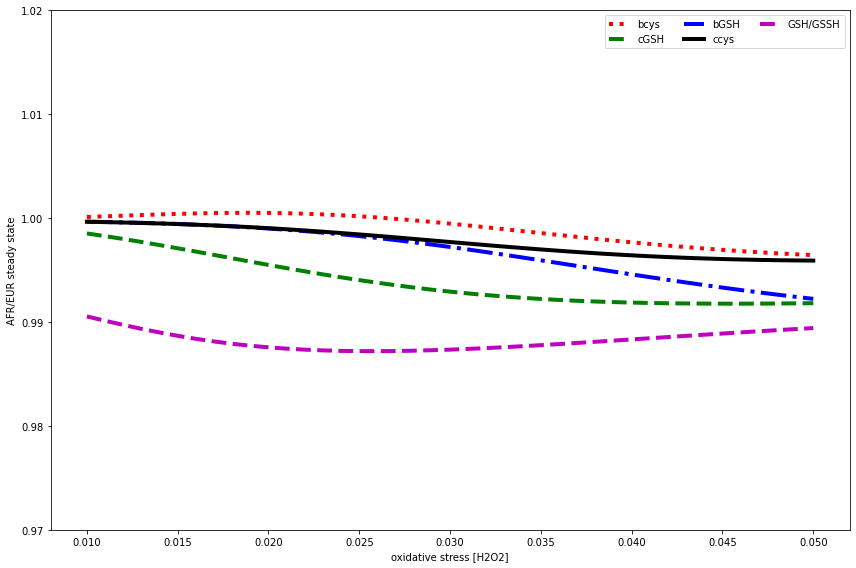

In [5]:
ratios = { "flux":{k:list() for k in European["flux"].keys()}, "cmpd":{k:list() for k in European["cmpd"].keys()}, "xval":list() }
AFR = 10 # 10 base pair allele
EUR = 11 # 11 base pair allele
for H2O2 in np.arange(.01,.051,.001):
    European = GPX.steadyStateDict(50,GPXvm(EUR),H2O2)
    African = GPX.steadyStateDict(50,GPXvm(AFR),H2O2)
    ratios["xval"].append(H2O2)
    a = [ratios["flux"][k].append(African["flux"][k]/European["flux"][k]) for k in European["flux"].keys()]
    a = [ratios["cmpd"][k].append(African["cmpd"][k]/European["cmpd"][k]) for k in European["cmpd"].keys()]

# plot results of the simulation    
fig, ax = plt.subplots(figsize=(12,8))
plt.xlabel("oxidative stress [H2O2]")
plt.ylabel("AFR/EUR steady state")
plt.plot(ratios["xval"],ratios["cmpd"]["bcys"],'r:',label = "bcys",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["cGSH"],'g--',label = "cGSH",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["bGSH"],'b-.',label = "bGSH",linewidth=4)
plt.plot(ratios["xval"],ratios["cmpd"]["ccys"],'k-',label = "ccys",linewidth=4)
plt.plot(ratios["xval"],[ratios["cmpd"]["cGSH"][i]/ratios["cmpd"]["cGSSG"][i] for i in range(len(ratios["cmpd"]["cGSSG"]))],'m--',label = "GSH/GSSH",linewidth=4)
plt.ylim((.97,1.02))
plt.tight_layout()
plt.legend(ncol=3)
plt.show()